In [91]:
import os
import pandas as pd
import json
import tqdm
import numpy as np
import re

In [92]:
dir_name = "unshuffled_benchmark_results"

In [93]:
records = os.listdir(dir_name)
records = [_ for _ in records if _.split(".")[-1]=='json']
records = sorted(records)
records[:10]

['AutoSAD_10_cover_1.json',
 'AutoSAD_10_cover_10.json',
 'AutoSAD_10_cover_2.json',
 'AutoSAD_10_cover_3.json',
 'AutoSAD_10_cover_4.json',
 'AutoSAD_10_cover_5.json',
 'AutoSAD_10_cover_6.json',
 'AutoSAD_10_cover_7.json',
 'AutoSAD_10_cover_8.json',
 'AutoSAD_10_cover_9.json']

In [94]:
len(records)

960

In [95]:
df_raw = pd.DataFrame()

In [96]:
for record in tqdm.tqdm(records):
    try:
        # To read the dictionary from the JSON file
        with open(f'{dir_name}/{record}', 'r') as json_file:
            loaded_record = json.load(json_file)
            rec = {
                'run_count':loaded_record['run_count'],
                "seed":loaded_record['seed'],
                "model":loaded_record['model'],
               "dataset":loaded_record['dataset'],
               "auc":loaded_record['auc'],
            "total_runtime":loaded_record['total_runtime'],
                "total_memory_usage":loaded_record['total_memory_usage'],
              "Instances":loaded_record['Instances'],
              }
            df_raw = df_raw._append(rec, ignore_index=True)
    except Exception as e:
        print(f"Error : {record} : {e}")
        continue

100%|███████████████████████████████████████| 960/960 [00:00<00:00, 1664.14it/s]


In [97]:
df_raw

,run_count,seed,model,dataset,auc,total_runtime,total_memory_usage,Instances
0,1,4,AutoSAD,10_cover,0.915895,29.629844,30.816406,286048
1,10,2,AutoSAD,10_cover,0.841734,35.575655,33.207031,286048
2,2,4,AutoSAD,10_cover,0.915895,28.387068,29.417969,286048
3,3,26,AutoSAD,10_cover,0.871554,31.092576,179.230469,286048
4,4,26,AutoSAD,10_cover,0.871554,31.764330,177.937500,286048
...,...,...,...,...,...,...,...,...
955,5,77,RRCF,9_census,0.612721,1707.498384,71.816406,299285
956,6,80,RRCF,9_census,0.612721,1649.932450,63.527344,299285
957,7,9,RRCF,9_census,0.612721,1878.201475,65.183594,299285
958,8,99,RRCF,9_census,0.612721,1604.622359,66.328125,299285


In [98]:
#df_raw =df_raw[df_raw['model']!="AutoSAD"]
#df_raw =df_raw[df_raw['model']!="AutoSAD(Score)"]
#df_raw =df_raw[df_raw['model']!="AutoSAD(MedCorr)"]

In [99]:
df_raw =df_raw[df_raw['model']!="RSHash"]

In [100]:
#df_raw =df_raw[df_raw['dataset']!="9_census"]

In [101]:
df_raw[df_raw['model']=="AutoSAD"].groupby(['model', 'dataset'])['run_count'].count()

model    dataset         
AutoSAD  10_cover            10
         11_donors           10
         13_fraud            10
         16_http             10
         1_ALOI              10
         32_shuttle          10
         33_skin             10
         34_smtp             10
         3_backdoor          10
         48_chess            10
         49_kddcup99_prob    10
         50_bank             10
         51_kddcup99_u2r     10
         5_campaign          10
         8_celeba            10
         9_census            10
Name: run_count, dtype: int64

In [102]:
df_raw.groupby(['model', 'dataset'])['run_count'].count()

model    dataset        
AutoSAD  10_cover           10
         11_donors          10
         13_fraud           10
         16_http            10
         1_ALOI             10
                            ..
RRCF     50_bank            10
         51_kddcup99_u2r    10
         5_campaign         10
         8_celeba           10
         9_census           10
Name: run_count, Length: 96, dtype: int64

In [139]:
temp_df = df_raw.groupby(['model','dataset'])['auc'].aggregate(['mean','std'])
temp_df.reset_index(inplace=True)

In [140]:
temp_df

,model,dataset,mean,std
0,AutoSAD,10_cover,0.873770,0.023965
1,AutoSAD,11_donors,0.852736,0.014304
2,AutoSAD,13_fraud,0.946574,0.005000
3,AutoSAD,16_http,0.878737,0.046253
4,AutoSAD,1_ALOI,0.729053,0.085163
...,...,...,...,...
91,RRCF,50_bank,0.632476,0.000000
92,RRCF,51_kddcup99_u2r,0.916362,0.000000
93,RRCF,5_campaign,0.665848,0.000000
94,RRCF,8_celeba,0.736743,0.000000


In [141]:
# List of dataset names for anomaly detection
datasets = [
    '8_celeba',
    '33_skin',
    '34_smtp',
    '11_donors',
    '5_campaign',
    '10_cover',
    '3_backdoor',
    '16_http',
    '32_shuttle',
    '13_fraud',
    '9_census',
    '1_ALOI',
    '48_chess',
    '49_kddcup99_prob',
    '50_bank',
    '51_kddcup99_u2r',
]

In [142]:
temp_df['score'] = [f"{mean:.3f}±{std:.3f}" for mean, std in zip(temp_df['mean'], temp_df['std'])]

In [143]:
temp_df = temp_df.pivot_table(index='dataset',columns='model',values='score',aggfunc='first').reset_index(drop=False).reset_index(drop=True)
temp_df.columns.name=None
temp_df = temp_df.set_index('dataset')
temp_df

,AutoSAD,HST,IFASD,LODA,OIF,RRCF
dataset,,,,,,
10_cover,0.874±0.024,0.509±0.010,0.206±0.023,0.767±0.036,0.792±0.028,0.176±0.000
11_donors,0.853±0.014,0.712±0.043,0.545±0.081,0.409±0.141,0.788±0.080,0.818±0.000
13_fraud,0.947±0.005,0.920±0.006,0.937±0.009,0.725±0.081,0.941±0.008,0.949±0.000
16_http,0.879±0.046,0.201±0.013,0.749±0.252,0.313±0.213,0.362±0.091,0.272±0.000
1_ALOI,0.729±0.085,0.713±0.015,0.006±0.000,0.657±0.074,0.609±0.078,0.724±0.000
32_shuttle,0.987±0.002,0.980±0.001,0.949±0.003,0.913±0.038,0.986±0.005,0.981±0.000
33_skin,0.866±0.012,0.105±0.003,0.746±0.109,0.424±0.055,0.187±0.024,0.141±0.000
34_smtp,0.915±0.009,0.868±0.007,0.768±0.037,0.724±0.078,0.853±0.021,0.810±0.000
3_backdoor,0.760±0.043,0.583±0.055,0.487±0.127,0.644±0.076,0.654±0.103,0.654±0.000


In [144]:
temp_df = temp_df.reindex(datasets)
temp_df.index = [i.split("_")[-1] for i in temp_df.index]

In [145]:
temp_df

,AutoSAD,HST,IFASD,LODA,OIF,RRCF
celeba,0.757±0.032,0.728±0.026,0.536±0.097,0.541±0.077,0.746±0.052,0.737±0.000
skin,0.866±0.012,0.105±0.003,0.746±0.109,0.424±0.055,0.187±0.024,0.141±0.000
smtp,0.915±0.009,0.868±0.007,0.768±0.037,0.724±0.078,0.853±0.021,0.810±0.000
donors,0.853±0.014,0.712±0.043,0.545±0.081,0.409±0.141,0.788±0.080,0.818±0.000
campaign,0.690±0.017,0.700±0.017,0.519±0.076,0.569±0.043,0.644±0.027,0.666±0.000
cover,0.874±0.024,0.509±0.010,0.206±0.023,0.767±0.036,0.792±0.028,0.176±0.000
backdoor,0.760±0.043,0.583±0.055,0.487±0.127,0.644±0.076,0.654±0.103,0.654±0.000
http,0.879±0.046,0.201±0.013,0.749±0.252,0.313±0.213,0.362±0.091,0.272±0.000
shuttle,0.987±0.002,0.980±0.001,0.949±0.003,0.913±0.038,0.986±0.005,0.981±0.000
fraud,0.947±0.005,0.920±0.006,0.937±0.009,0.725±0.081,0.941±0.008,0.949±0.000


In [146]:
def add_mean_row_to_dataframe(_df):
    # Calculate the mean for each column and create a DataFrame for the mean values
    mean_values = _df.mean().to_frame().transpose()
    
    # Append the mean values DataFrame to the original DataFrame
    df_with_mean = _df._append(mean_values, ignore_index=False)
    
    df_with_mean.rename({df_with_mean.index[-1]: 'Mean'}, inplace=True)
    
    return df_with_mean

def add_mean_rank_row_to_dataframe(_df,ascending=True):
    
    df_temp = _df[:-1].rank(axis=1,ascending=ascending)
    
    # Calculate the mean for each column and create a DataFrame for the mean values
    mean_values = df_temp.mean().to_frame().transpose()
    
    # Append the mean values DataFrame to the original DataFrame
    df_with_mean = _df._append(mean_values, ignore_index=False)
    
    df_with_mean.rename({df_with_mean.index[-1]: 'Rank'}, inplace=True)
    
    return df_with_mean

In [147]:
if 'Mean' not in datasets:
    datasets +=['Mean','Rank']
    #datasets +=['Mean']
    print("Added Mean and Mean Rank")

Added Mean and Mean Rank


# AUC SCORE

In [148]:
temp_df = df_raw.pivot_table(index='dataset',columns='model',values='auc',aggfunc='mean').reset_index(drop=False).reset_index(drop=True)

In [149]:
temp_df

model,dataset,AutoSAD,HST,IFASD,LODA,OIF,RRCF
0,10_cover,0.873770,0.509294,0.206296,0.767292,0.792225,0.176133
1,11_donors,0.852736,0.712265,0.545131,0.409211,0.788495,0.817890
2,13_fraud,0.946574,0.920075,0.936684,0.724556,0.940512,0.948673
3,16_http,0.878737,0.200747,0.748656,0.312600,0.361554,0.271683
4,1_ALOI,0.729053,0.713333,0.005622,0.656814,0.608903,0.724082
5,32_shuttle,0.986889,0.980398,0.948949,0.913083,0.986254,0.980766
6,33_skin,0.865907,0.104965,0.745513,0.423965,0.187430,0.141489
7,34_smtp,0.915055,0.867670,0.767637,0.723690,0.852558,0.809903
8,3_backdoor,0.759731,0.582982,0.487086,0.643539,0.654007,0.654086
9,48_chess,0.938747,0.615332,0.627943,0.879762,0.796052,0.943677


In [150]:
temp_df.columns.name=None
temp_df = temp_df.set_index('dataset')#.multiply(100)
temp_df = temp_df.loc[[d for d in datasets if d in temp_df.index]]
# temp_df = temp_df[columns_order]
temp_df = add_mean_row_to_dataframe(temp_df)
temp_df = add_mean_rank_row_to_dataframe(temp_df,ascending=False)
temp_df = temp_df.reindex(datasets)
temp_df.index = [i.split("_")[-1] for i in temp_df.index]
# temp_df.columns = columns_rename
temp_df.style.highlight_max(color = 'yellow', axis = 1)

,AutoSAD,HST,IFASD,LODA,OIF,RRCF
celeba,0.757011,0.728112,0.535962,0.540548,0.746059,0.736743
skin,0.865907,0.104965,0.745513,0.423965,0.187430,0.141489
smtp,0.915055,0.867670,0.767637,0.723690,0.852558,0.809903
donors,0.852736,0.712265,0.545131,0.409211,0.788495,0.817890
campaign,0.689903,0.699740,0.518843,0.569225,0.643887,0.665848
cover,0.873770,0.509294,0.206296,0.767292,0.792225,0.176133
backdoor,0.759731,0.582982,0.487086,0.643539,0.654007,0.654086
http,0.878737,0.200747,0.748656,0.312600,0.361554,0.271683
shuttle,0.986889,0.980398,0.948949,0.913083,0.986254,0.980766
fraud,0.946574,0.920075,0.936684,0.724556,0.940512,0.948673


In [151]:
# Calculate the best performance for each dataset
#temp_df['Best_Performance'] = temp_df.iloc[:, 1:].max(axis=1)

In [152]:
# Calculate the difference of AutoSAD from best performance
#temp_df['AutoSAD_Performance_Diff'] = temp_df['Best_Performance'] - temp_df['AutoSAD']

In [153]:
#temp_df

In [154]:
#temp_df.sort_values(by='AutoSAD_Performance_Diff', ascending=False, inplace=False)

In [155]:
from autorank import autorank, create_report,plot_stats,latex_table
import matplotlib.pyplot as plt

In [156]:
from matplotlib import rcParams

rcParams['font.weight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18

plt.rcParams.update({'font.size': 18})

In [157]:
res = autorank(temp_df,alpha=0.11,order='descending',verbose=True,effect_size="cohen_d",force_mode='nonparametric')

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Rejecting null hypothesis that data is normal for column AutoSAD (p=0.013099<0.018333)
Rejecting null hypothesis that data is normal for column HST (p=0.000001<0.018333)
Rejecting null hypothesis that data is normal for column IFASD (p=0.000000<0.018333)
Rejecting null hypothesis that data is normal for column LODA (p=0.000000<0.018333)
Rejecting null hypothesis that data is normal for column OIF (p=0.000002<0.018333)
Rejecting null hypothesis that data is normal for column RRCF (p=0.000014<0.018333)
Using Levene's test for homoscedacity of non-normal data.
Fail to reject null hypothesis that all variances are equal (p=0.871870>=0.110000)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000002)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical d

In [159]:
file_name = 'autocad_cd_comparison'

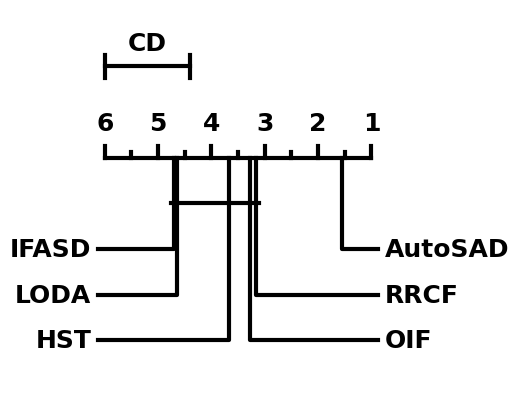

In [164]:
plot_stats(res,allow_insignificant=True)
# Access the current figure and resize it
fig = plt.gcf()
ax = plt.gca()

# Increase the thickness of all lines in the plot
for line in ax.get_lines():
    line.set_linewidth(3.0)  # Set line width to 2.0 (adjust as needed)
    
fig.set_size_inches(4, 4)  # Set the size to 3x4 inches
plt.savefig(f'CHARTS/{file_name}.png',dpi=300,bbox_inches='tight')
plt.show()

## Time

In [38]:
temp_df = df_raw.pivot_table(index='dataset',columns='model',values='total_runtime',aggfunc='mean').reset_index(drop=False).reset_index(drop=True)

In [39]:
temp_df

model,dataset,AutoSAD,HST,IFASD,LODA,OIF,RRCF
0,10_cover,63.769706,104.143950,23.639541,24.370396,201.488526,57.385234
1,11_donors,1115.981436,284.017354,108.112023,96.807787,512.630207,199.179068
2,13_fraud,299.782549,105.529288,23.500687,24.395460,257.750289,107.600227
3,16_http,94.981154,245.319514,83.939439,64.617782,381.317836,131.081276
4,1_ALOI,81.410472,15.101644,1.054088,1.807196,37.850903,13.899523
5,32_shuttle,35.155640,14.653214,1.142585,1.763342,27.912358,6.111365
6,33_skin,33.196818,83.539029,16.343018,17.097290,154.673162,33.824885
7,34_smtp,98.762385,29.836646,3.104431,4.259920,55.587765,8.993054
8,3_backdoor,233.385389,29.475835,2.789601,5.566010,159.711816,273.016271
9,48_chess,107.309729,10.353289,0.482784,1.254431,15.617361,3.157782


In [40]:
temp_df.columns.name=None
temp_df = temp_df.set_index('dataset')#.multiply(100)
#temp_df = temp_df[columns_order]
temp_df = add_mean_row_to_dataframe(temp_df)#.multiply(100)
temp_df = add_mean_rank_row_to_dataframe(temp_df,ascending=True)
temp_df = temp_df.reindex(datasets)
temp_df.index = [i.split("_")[-1] for i in temp_df.index]
#temp_df.columns = columns_rename
temp_df.style.highlight_min(color = 'yellow', axis = 1)

,AutoSAD,HST,IFASD,LODA,OIF,RRCF
celeba,372.250412,73.319196,12.870890,14.749454,208.443758,98.084423
skin,33.196818,83.539029,16.343018,17.097290,154.673162,33.824885
smtp,98.762385,29.836646,3.104431,4.259920,55.587765,8.993054
donors,1115.981436,284.017354,108.112023,96.807787,512.630207,199.179068
campaign,103.708611,10.235498,0.820774,1.571501,43.137076,28.716233
cover,63.769706,104.143950,23.639541,24.370396,201.488526,57.385234
backdoor,233.385389,29.475835,2.789601,5.566010,159.711816,273.016271
http,94.981154,245.319514,83.939439,64.617782,381.317836,131.081276
shuttle,35.155640,14.653214,1.142585,1.763342,27.912358,6.111365
fraud,299.782549,105.529288,23.500687,24.395460,257.750289,107.600227


# Memory

In [41]:
temp_df = df_raw.pivot_table(index='dataset',columns='model',values='total_memory_usage',aggfunc='mean').reset_index(drop=False).reset_index(drop=True)

In [42]:
temp_df

model,dataset,AutoSAD,HST,IFASD,LODA,OIF,RRCF
0,10_cover,55.479297,32.902344,32.118359,30.190234,31.060156,31.142578
1,11_donors,67.375781,61.762891,56.309766,67.655469,66.887891,66.742969
2,13_fraud,42.338672,31.316797,29.626172,30.517969,31.808594,34.573828
3,16_http,45.972656,58.919922,44.360937,48.007031,54.112109,52.781641
4,1_ALOI,63.437891,7.462500,7.555469,6.749219,7.564453,8.075000
5,32_shuttle,6.818750,7.509375,7.369531,6.978125,7.325781,7.185547
6,33_skin,80.430469,26.987500,25.003125,25.333984,26.462500,25.905078
7,34_smtp,13.078906,12.335547,11.557031,12.531641,12.761719,12.469531
8,3_backdoor,17.457422,12.505078,20.499219,11.925781,16.710938,24.493359
9,48_chess,13.176172,4.440625,5.600000,4.753906,4.544531,4.338672


In [43]:
temp_df.columns.name=None
temp_df = temp_df.set_index('dataset')#.multiply(100)
# temp_df = temp_df[columns_order]
temp_df = add_mean_row_to_dataframe(temp_df)#.multiply(100)
temp_df = add_mean_rank_row_to_dataframe(temp_df,ascending=True)
temp_df = temp_df.reindex(datasets)
temp_df.index = [i.split("_")[-1] for i in temp_df.index]
#temp_df.columns = columns_rename
temp_df.style.highlight_min(color = 'yellow', axis = 1)

,AutoSAD,HST,IFASD,LODA,OIF,RRCF
celeba,24.444141,24.725781,21.148047,23.680469,25.393750,26.292578
skin,80.430469,26.987500,25.003125,25.333984,26.462500,25.905078
smtp,13.078906,12.335547,11.557031,12.531641,12.761719,12.469531
donors,67.375781,61.762891,56.309766,67.655469,66.887891,66.742969
campaign,80.927344,6.824219,7.169141,5.547656,7.909375,9.564844
cover,55.479297,32.902344,32.118359,30.190234,31.060156,31.142578
backdoor,17.457422,12.505078,20.499219,11.925781,16.710938,24.493359
http,45.972656,58.919922,44.360937,48.007031,54.112109,52.781641
shuttle,6.818750,7.509375,7.369531,6.978125,7.325781,7.185547
fraud,42.338672,31.316797,29.626172,30.517969,31.808594,34.573828


In [45]:
file_name = "sad_time_and_memory_comp_plot"

Algorithms: ['AutoSAD', 'HST', 'IFASD', 'LODA', 'OIF', 'RRCF']
Time values: [301.9386821821332, 73.13853801190852, 19.172355879843234, 18.923317013680936, 193.51671200692653, 167.25399608016014]
Memory values: [63.573950195312506, 21.69951171875, 21.095410156249997, 20.7709228515625, 22.31650390625, 24.847021484375]


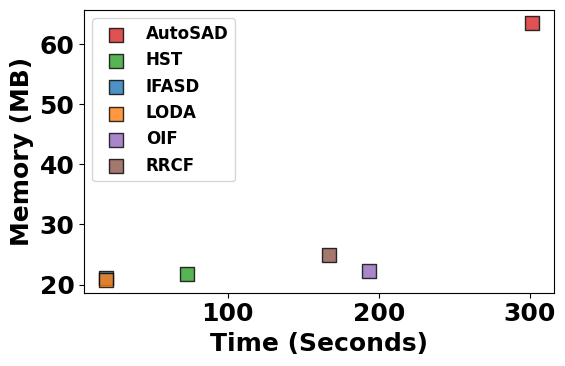

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.weight'] = 'bold'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'

# Create time dataframe
time_df = df_raw.pivot_table(index='dataset',columns='model',values='total_runtime',aggfunc='mean').reset_index(drop=False).reset_index(drop=True)
time_df.columns.name=None
time_df = time_df.set_index('dataset')
time_df = add_mean_row_to_dataframe(time_df)

# Create memory dataframe  
memory_df = df_raw.pivot_table(index='dataset',columns='model',values='total_memory_usage',aggfunc='mean').reset_index(drop=False).reset_index(drop=True)
memory_df.columns.name=None
memory_df = memory_df.set_index('dataset')
memory_df = add_mean_row_to_dataframe(memory_df)

# Get algorithms, time and memory values dynamically from the Mean row
algorithms = list(time_df.columns)
time = time_df.loc['Mean'].values.tolist()
memory = memory_df.loc['Mean'].values.tolist()

print(f"Algorithms: {algorithms}")
print(f"Time values: {time}")
print(f"Memory values: {memory}")

# Set the figsize
plt.figure(figsize=(6, 4))

# Define a color palette for algorithms
colors = ['#d62728', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']  # Using a predefined color map for distinct colors

# Plotting the scatter plot
for i, algorithm in enumerate(algorithms):
        plt.scatter(time[i], memory[i], color=colors[i], label=algorithm, s=100, alpha=0.8, edgecolor='black', marker='s')

# Adding labels and ticks
plt.xlabel('Time (Seconds)', fontsize=18)
plt.ylabel('Memory (MB)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding legend
plt.legend(fontsize=12, loc='upper left')

# Ensure proper layout
plt.tight_layout()

plt.savefig(f'charts/{file_name}.png',dpi=300,bbox_inches='tight')

# Display the plot
plt.show()